**Постановка  бизнес  задачи**

Задача — разработать модель, способную предсказывать цену на объект недвижимости на основе его характеристик в городе Мумбаи, Индия. Данная система поможет клиентам и агентам принимать решения о продаже и покупке.

**1. Постановка ML-задачи**

Регрессионная модель, которая предсказывает числовую переменную (цену объекта в рупиях), основываясь на признаках, таких как местоположение в городе, количество комнат, площадь, тип недвижимости и т.д.
Модель должна находить взаимосвязь этих признаков с ценой и делать качественные предсказания.

**Набор данных, достаточный для решения поставленной задачи**

Для решения задачи будет использован набор данных Mumbai House Price Data, содержащий 70 000 записей о недвижимости в городе Мумбаи, Индия.
Каждая запись соответствует объекту недвижимости и включает различные признаки, описывающие его, такие как вид недвижимости, район, площадь и т.д.
Датасет был найден на Kaggle, а данные взяты с популярного индийского сайта о недвижимости.
 https://www.kaggle.com/datasets/kevinnadar22/mumbai-house-price-data-70k-entries?resource=download

 https://origin.makaan.com/housing-buyer-redirect

**2. Выбор и обоснование метрики для измерения качества**

**RMSE (Root Mean Squared Error)**

Позволяет узнать, насколько модель в среднем ошибается.
Например, если RMSE = 500 000 ₹, это значит, что модель в среднем отклоняется от реальной стоимости недвижимости на эту сумму.
RMSE сильно реагирует на большие ошибки и, например, в контексте задачи показывает, насколько модель ошибается в дорогой недвижимости.
RMSE сильнее наказывает крупные ошибки, что важно при наличии дорогой недвижимости.

**MAE (Mean Absolute Error)**

Также позволяет узнать, насколько модель в среднем ошибается. Все ошибки примерно одинаковы.
Удобно использовать в случае примерно одинаковых цен объектов.

**R² (Coefficient of Determination)**

Коэффициент детерминации показывает, насколько хорошо модель объясняет изменчивость цен на недвижимость.
Например, если R² = 80%, это значит, что модель объясняет 80% вариаций стоимости квартир.
Данная метрика помогает оценить, насколько модель «понимает» рынок недвижимости.

В качестве основной метрики было решено выбрать RMSE, так как эта метрика чувствительна к большим отклонениям, что важно на рынке недвижимости Мумбая, где разброс стоимости объектов очень велик.
Данная метрика даст понимание того, как модель ошибается при оценке элитной недвижимости, что позволит предотвратить крупные финансовые потери.

Метрики R² и MAE будут использованы дополнительно.


In [1]:
!pip -q install kagglehub
import kagglehub
path = kagglehub.dataset_download("kevinnadar22/mumbai-house-price-data-70k-entries")
print("Path to dataset files:", path)

100%|██████████| 1.76M/1.76M [00:00<00:00, 77.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/kevinnadar22/mumbai-house-price-data-70k-entries/versions/3


In [2]:
import pandas as pd
import os

for file in os.listdir(path):
    if file.endswith(".csv"):
        csv_path = os.path.join(path, file)
        break

df = pd.read_csv(csv_path)
df.shape, df.columns.tolist()

((71938, 15),
 ['title',
  'price',
  'area',
  'price_per_sqft',
  'locality',
  'city',
  'property_type',
  'bedroom_num',
  'bathroom_num',
  'balcony_num',
  'furnished',
  'age',
  'total_floors',
  'latitude',
  'longitude'])

In [6]:
initial_shape = df.shape
df = df.drop_duplicates()
print(f"Дубликаты удалены: {initial_shape[0] - df.shape[0]}")
print(f"Новая форма набора данных: {df.shape}")

Дубликаты удалены: 20171
Новая форма набора данных: (51767, 16)


In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

print("Размер набора данных:", df.shape)
print("\nИнформация о наборе данных:")
df.info()

print("\nКоличество дубликатов:", df.duplicated().sum())
print("\nКоличество пропущенных значений по столбцам:")
print(df.isnull().sum())

print("\nКоличество уникальных значений в категориальных признаках:")
print(df.select_dtypes(include='object').nunique())

print("\nСтатистическое описание числовых признаков:")
display(df.describe())

Размер набора данных: (51767, 16)

Информация о наборе данных:
<class 'pandas.core.frame.DataFrame'>
Index: 51767 entries, 0 to 71937
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           51767 non-null  object 
 1   price           51767 non-null  int64  
 2   area            51767 non-null  int64  
 3   price_per_sqft  51767 non-null  float64
 4   locality        51767 non-null  object 
 5   city            51767 non-null  object 
 6   property_type   51767 non-null  object 
 7   bedroom_num     51767 non-null  int64  
 8   bathroom_num    51767 non-null  int64  
 9   balcony_num     51767 non-null  int64  
 10  furnished       51767 non-null  object 
 11  age             51767 non-null  int64  
 12  total_floors    51767 non-null  int64  
 13  latitude        51767 non-null  float64
 14  longitude       51767 non-null  float64
 15  log_price       51767 non-null  float64
dtypes: float64(4), int

,price,area,price_per_sqft,bedroom_num,bathroom_num,balcony_num,age,total_floors,latitude,longitude,log_price
count,5.176700e+04,51767.000000,51767.000000,51767.000000,51767.000000,51767.000000,51767.000000,51767.000000,51767.000000,51767.000000,51767.000000
mean,2.029837e+07,973.682018,18390.293804,2.000444,2.100836,0.164468,2.363919,1.003748,19.172944,72.966697,16.336877
std,3.467431e+07,661.831575,13099.807453,0.929445,0.862753,0.592744,4.377339,0.323734,0.532951,0.457737,0.923843
min,3.200000e+04,123.000000,25.376685,0.000000,1.000000,0.000000,0.000000,1.000000,12.889899,72.435379,10.373522
25%,6.500000e+06,610.000000,8901.538576,1.000000,2.000000,0.000000,0.000000,1.000000,19.069774,72.856712,15.687313
50%,1.200000e+07,804.000000,15642.000000,2.000000,2.000000,0.000000,0.000000,1.000000,19.160484,72.913185,16.300417
75%,2.200000e+07,1144.000000,23855.656316,3.000000,2.000000,0.000000,3.000000,1.000000,19.228041,73.021202,16.906553
max,2.147484e+09,24109.000000,290000.000000,15.000000,15.000000,15.000000,57.000000,70.000000,72.868339,91.804413,21.487563


**Первичный анализ данных**

Размер набора данных: 71 938 строк и 15 столбцов.
Пропусков нет.
Есть дубликаты — 20 171, что может означать, что некоторые объявления о продаже были выставлены несколько раз.

Категориальные признаки дают дополнительную информацию.
Например, property_type = 5 показывает, что есть пять видов недвижимости.
А city = 5 скорее указывает на то, что “Мумбаи” мог быть написан разными способами, следовательно, требуется привести данные к единому формату.

Статистическое описание числовых признаков даёт представление, например, о средней цене и площади, а такие данные, как максимальная и минимальная цена, позволяют оценить разброс на рынке.

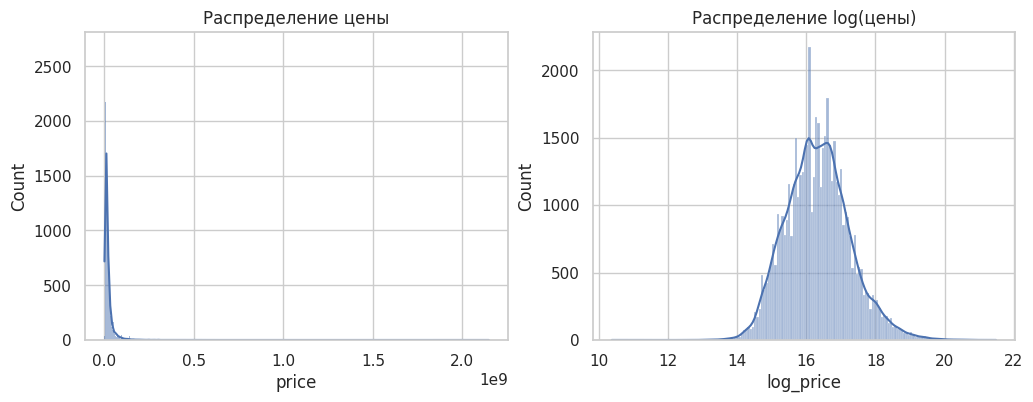

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df["log_price"] = np.log1p(df["price"])
fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.histplot(df["price"], kde=True, ax=ax[0])
sns.histplot(df["log_price"], kde=True, ax=ax[1])
ax[0].set_title("Распределение цены")
ax[1].set_title("Распределение log(цены)")
plt.show()

Переменная price имеет сильную правостороннюю асимметрию — большинство объектов на рынке представлены в диапазоне низких цен, а небольшая часть формирует длинный хвост высоких значений (дорогая элитная недвижимость).

После применения логарифмического преобразования распределение стало ближе к нормальному.
Логарифмирование эффективно уменьшает влияние экстремальных значений и позволяет более объективно анализировать зависимости между ценой и другими факторами.

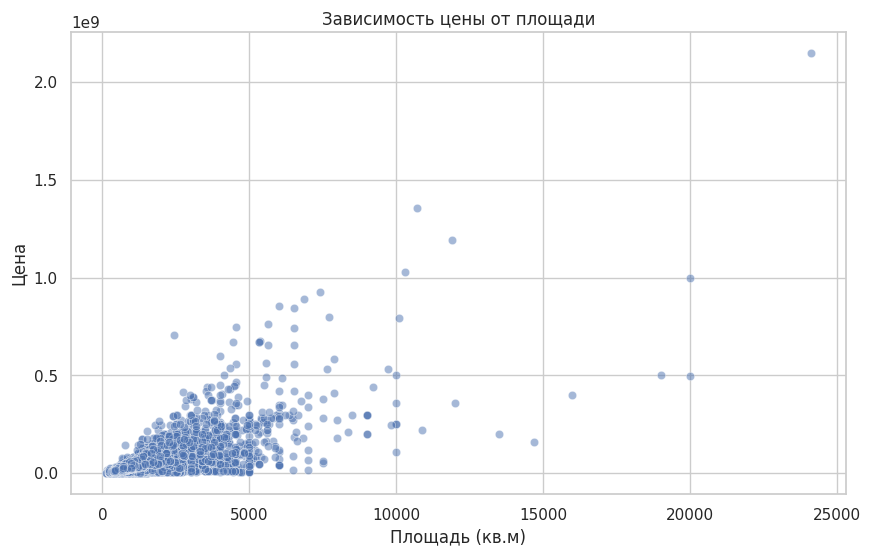

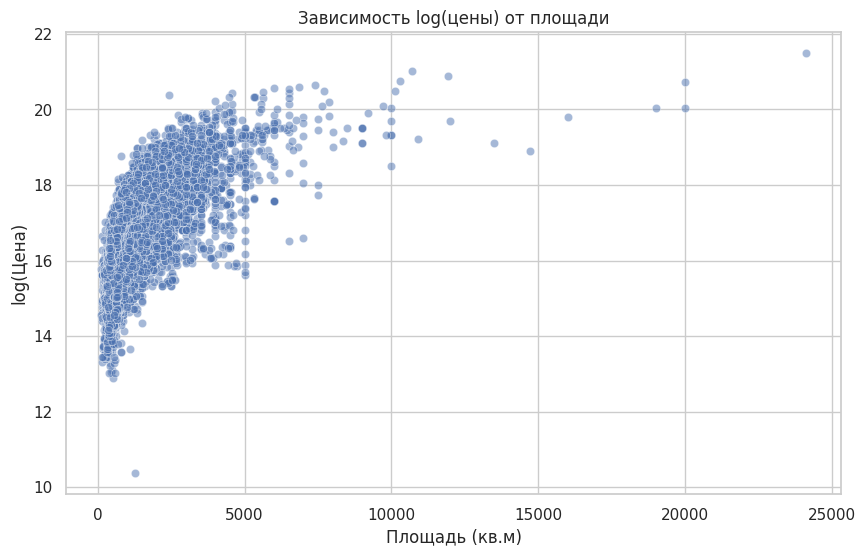

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='area', y='price', data=df, alpha=0.5)
plt.title('Зависимость цены от площади')
plt.xlabel('Площадь (кв.м)')
plt.ylabel('Цена')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='area', y='log_price', data=df, alpha=0.5)
plt.title('Зависимость log(цены) от площади')
plt.xlabel('Площадь (кв.м)')
plt.ylabel('log(Цена)')
plt.show()

На графике видно, что между площадью и ценой есть зависимость — с ростом площади стоимость недвижимости увеличивается.
Однако распределение сильно скошено: в данных преобладают объекты небольшой площади и относительно низкой цены.
После логарифмического преобразования распределение становится более симметричным, и зависимость между площадью и ценой выглядит ближе к линейной.

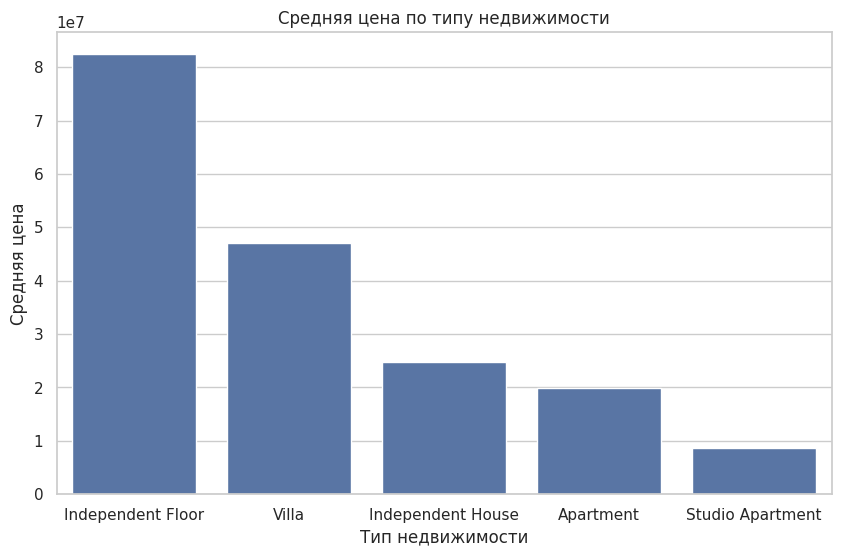

In [13]:
plt.figure(figsize=(10,6))
avg_prices = df.groupby('property_type')['price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_prices.index, y=avg_prices.values)
plt.title('Средняя цена по типу недвижимости')
plt.xlabel('Тип недвижимости')
plt.ylabel('Средняя цена')
plt.show()

Эта визуализация позволяет увидеть, что самым дорогим объектом недвижимости является Independent Floor, скорее всего, из-за расположения в центре города.
На втором месте идут Villas, а самым дешёвым типом являются Studio Apartments.

In [16]:
fig = px.scatter_mapbox(df,
                        lat="latitude",
                        lon="longitude",
                        color="price",
                        size="area",
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        mapbox_style="carto-positron",
                        zoom=9,
                        title="Географическое распределение недвижимости в Мумбаи")
fig.show()

In [ ]:
from IPython.display import Image, display

display(Image(filename='Screenshot 2025-10-28 at 02.37.37.png'))

In [17]:
fig.write_html("mumbai_map.html")

In [ ]:
HTML не отобразился в Github визуализация расположена на фото "geo"

На географической визуализации видно, что дорогие объекты сконцентрированы в прибрежных районах западного Мумбая с видом на море.
Более дешёвая недвижимость расположена в центральных и восточных районах.
Распределение показывает неравномерность рынка недвижимости Мумбая — рядом могут находиться как дорогие, так и дешёвые объекты.

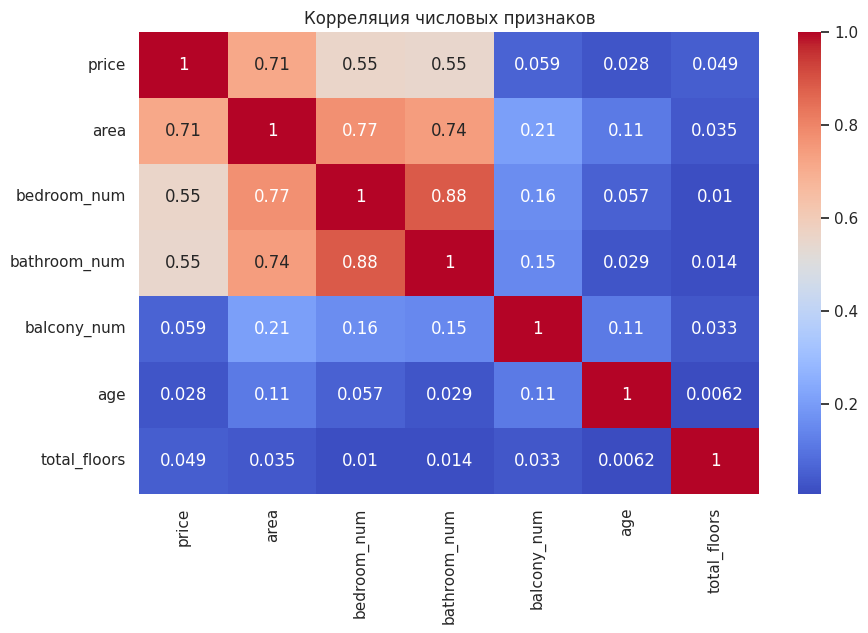

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['price', 'area', 'bedroom_num', 'bathroom_num', 'balcony_num', 'age', 'total_floors']].corr(),
            annot=True, cmap='coolwarm')
plt.title('Корреляция числовых признаков')
plt.show()

Из тепловой карты видно, что цена сильно коррелирует с площадью (0.71).
Есть положительная связь между ценой и количеством спален и ванных комнат (0.88) — это логично, поскольку большие квартиры обычно имеют больше комнат и стоят дороже.
Признаки возраста, количества балконов и этажности практически не связаны с ценой (корреляция < 0.1).
Это говорит о слабом влиянии этих факторов на стоимость объекта.

Следовательно, при дальнейшей работе следует концентрироваться на площади, количестве спален и ванных комнат.

**Главные выводы**

	1.	Распределение цен сильно скошено — на рынке доминируют относительно недорогие объекты.

	2.	Подтверждены некоторые «очевидные» гипотезы — например, о сильной связи цены и площади, а также типа недвижимости и цены.

	3.	Heatmap выявила сильную связь между количеством ванных комнат и спален.

	4.	Некоторые признаки, вроде наличия балкона, не оказывают значимого влияния на цену.

	5.	Географический анализ показал, что высокие цены сосредоточены в прибрежных районах западного Мумбая.
  
	6.	В данных не было пропусков, но были обнаружены дубликаты, которые были удалены перед началом анализа.

---



**Дальнейший план действий**

	1.	Найти аномальные объекты с чрезмерно высокой ценой или площадью — при необходимости удалить.

	2.	Проверить единообразие и согласованность названий категориальных переменных (например, названия города).

	3.	Создать новые признаки — цену за кв. метр, тип района (центр, пригород, побережье) и т.д.

	4.	Стандартизировать числовые признаки для дальнейшей работы.

	5.	Попробовать связаться с создателем датасета и запросить обновлённые данные за 2025 год.